In [ ]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import anndata
import scanpy as sc
import scanpy_scripts as ss

np.set_printoptions(linewidth=180)
sc.settings.verbosity = 1
expr_cmap = ss.lib.expression_colormap()

In [52]:
ad = sc.read('../data/h5ad/20200114/fetal_skin.lymphoid_B.doublet_removed_processed.20200130.h5ad')

Only considering the two last: ['.20200130', '.h5ad'].
Only considering the two last: ['.20200130', '.h5ad'].


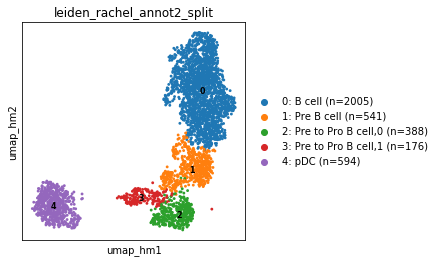

In [55]:
ss.lib.plot_embedding(ad, basis='umap_hm', groupby='leiden_rachel_annot2_split')

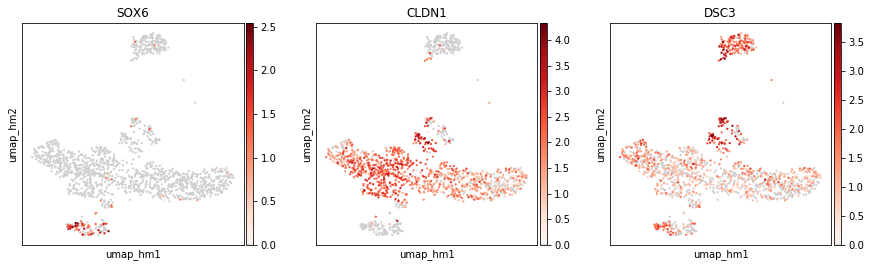

In [45]:
ss.lib.plot_scatter(ad, basis='umap_hm', color=['SOX6', 'CLDN1', 'DSC3'], color_map=expr_cmap, size=20)

In [56]:
ad.obs['rachel_annot3'] = ss.lib.regroup(ad, groupby='leiden_rachel_annot2_split', regroups={
    'Pre pro B cell': 'Pre to Pro B cell,1',
    'Pro B cell': 'Pre to Pro B cell,0',
})

In [57]:
ad.obs.rachel_annot3.value_counts()

B cell            2005
pDC                594
Pre B cell         541
Pro B cell         388
Pre pro B cell     176
Name: rachel_annot3, dtype: int64

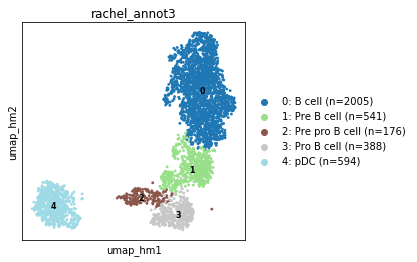

In [58]:
ss.lib.clear_colors(ad)
ss.lib.plot_embedding(ad, basis='umap_hm', groupby='rachel_annot3', palette='tab20')

In [59]:
ss.lib.clear_colors(ad)

In [60]:
ad.write('fetal_skin.lymphoid_B.doublet_removed_processed.20200403.h5ad', compression='lzf')